## Data Analysis Interview Challenges from Ultimate Inc.

In [24]:
# import package
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import calendar

#### Load Data

In [2]:
login_data = pd.read_json("logins.json")
ultimate_data = open('ultimate_data_challenge.json', 'r').readline()
ultimate_data = json.loads(ultimate_data)
ultimate_data = pd.DataFrame(ultimate_data)

In [3]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


We know that the data type of feature login_time is already datetime object and can be processed directly. 

### 1. Exploratory data analysis
Here, I am going to aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [13]:
login_data['count'] = 1
login_data.index = login_data['login_time']
login_data.head() 

,login_time,count
login_time,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1
1970-01-01 20:16:10,1970-01-01 20:16:10,1
1970-01-01 20:16:37,1970-01-01 20:16:37,1
1970-01-01 20:16:36,1970-01-01 20:16:36,1
1970-01-01 20:26:21,1970-01-01 20:26:21,1


In [17]:
int_15 = login_data.resample('15Min').sum().sort_values(['count'], ascending = False)
int_15['count'] = int_15.fillna(0)
int_15.head()

,count
login_time,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60


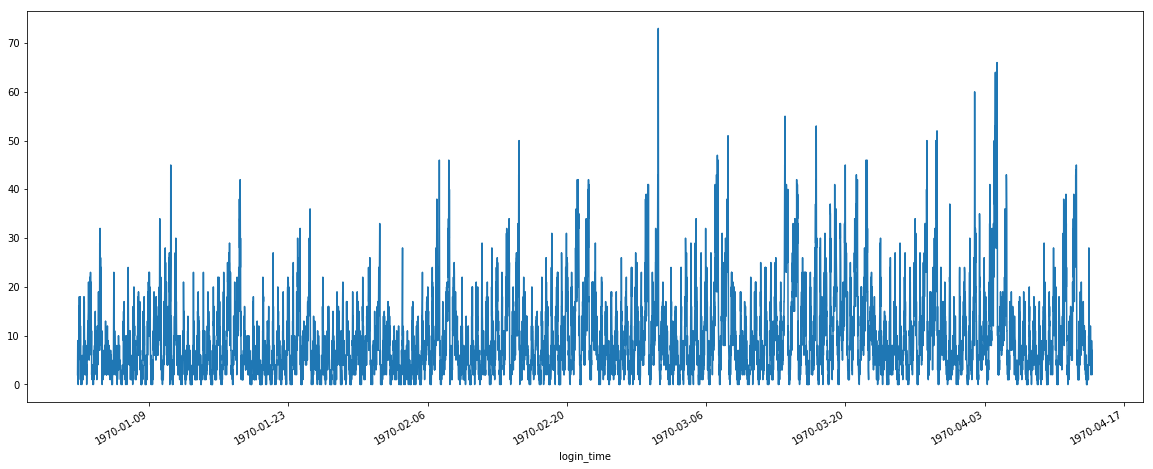

In [34]:
plt.figure(figsize = (20,8))
int_15['count'].plot()

It is interesting to see that most login time happen in the very early morning and in the late night.

In [27]:
days = list(calendar.day_abbr)
months = list(calendar.month_abbr)
login_data['month'] = login_data['login_time'].apply(lambda x: months[x.month])
login_data['day'] = login_data['login_time'].apply(lambda x: days[x.weekday()])
login_data['hour'] = login_data['login_time'].apply(lambda x: x.hour)
login_data['time'] = login_data['login_time'].apply(lambda x: x.time())

In [28]:
login_data.head()

,login_time,count,month,day,hour,time
login_time,,,,,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1,Jan,Thu,20,20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10,1,Jan,Thu,20,20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37,1,Jan,Thu,20,20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36,1,Jan,Thu,20,20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21,1,Jan,Thu,20,20:26:21


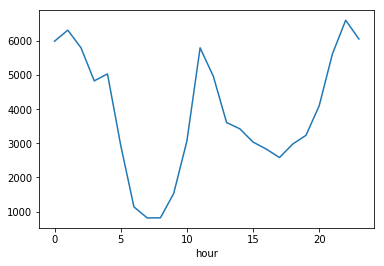

In [35]:
login_data.groupby('hour')['count'].sum().plot()

It can be visualized that users login to the platform around 8pm to 4am-5am, and 11am to 1pm. the result is interesting because we can see that most users use the platform after dinner or around lunch time.  

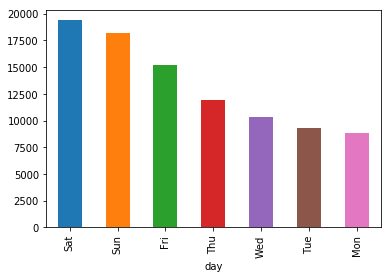

In [30]:
login_data.groupby('day')['count'].sum().sort_values(ascending = False).plot(kind = 'bar')

It seems that users are active on Friday and on the weekend, and most active on Saturday.

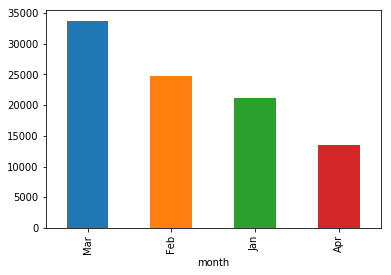

In [31]:
login_data.groupby('month')['count'].sum().sort_values(ascending = False).plot(kind = 'bar')

It is interesting to see that users are active in March, it may be something to do with the cultures or holidays in the country. Or because of the success of marketing promotion in the early year. Yet notice that these's a drastically drop in April, more marketing research should be done to analyze why such phenomon exists. 

### Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1.What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Since the manager's goal is to promote driver partners to be available in both cities, given other circumstances the same, my metrics would be calculate sum of the driver partners drive across from the two cities is larger than the sum of the driver partners before the policy released to be considered the success of the experiment.  



2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment
First, all the driver partners must have a machine to track their location while they are working, then we calculate how many drivers have been passed through the bridge from Ultimate Metropolis to Ultimate Gotham and from Ultimate Gotham to Ultimate Metropolis in a day. We compare the result before and after the experiment begins.

b. what statistical test(s) you will conduct to verify the significance of the observation
The significance will be evaulated based on the null hypothesis with z-score. The null hypothesis would be there is no difference between the sum of the driver partners driving to the other cities through the bridge before and after the experiment, while the alternative hypothesis would be the sum of the driver partners driving across through the bridge larger than the one before the experiment.  

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
If the observation is significant, then we can further calculate what exactly percentage increase after the experiment. The significance indicates that toll fee would influence people travel to another city. If the observation is insignificant, then the policy may be aborted or modified. Other factors that might influence people's willing to travel to the other city and may need to be taken into considerations.  

### Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

In [37]:
ultimate_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [38]:
ultimate_data.shape

(50000, 12)

In [39]:
ultimate_data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

Since the missing value is missing below 20%, missing values are dropped first. 

In [40]:
ulti_data_nona = ultimate_data.dropna()

In [46]:
ulti_data_nona.shape

(41445, 12)

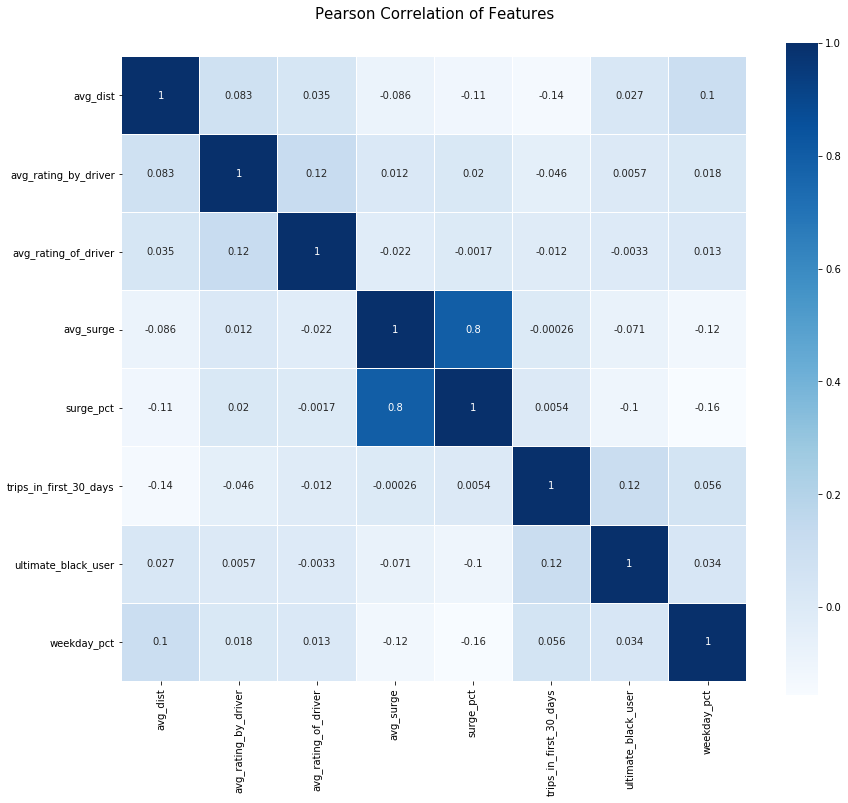

In [60]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(ulti_data_nona.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

It seems that most features are no correlated to each other, therefore the issue of multicollearity may be minimal. 

In [63]:
ulti_data_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


We can see that signup_date and last_trip_date are yet to be datetime object, therefore we need to covert them to datetime object for further manipulation.

In [64]:
# convert to datetime object
ulti_data_nona['signup_date'] = ulti_data_nona['signup_date'].apply(lambda x: pd.Timestamp(x, tz=None))
ulti_data_nona['last_trip_date'] = ulti_data_nona['last_trip_date'].apply(lambda x: pd.Timestamp(x, tz=None))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
ulti_data_nona['last_trip_date'].sort_values(ascending = False).head()

31481   2014-07-01
21753   2014-07-01
3397    2014-07-01
15733   2014-07-01
27068   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

The above result showed that the most updated date is 2014-07-01, therefore if any user is active within 2014-06-01 to 2014-07-01, then the user is considered to be retained.  

In [70]:
ulti_data_nona['retained'] = ulti_data_nona['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz = None) else 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
ulti_data_nona = ulti_data_nona.drop(['last_trip_date','signup_date'], axis = 1)

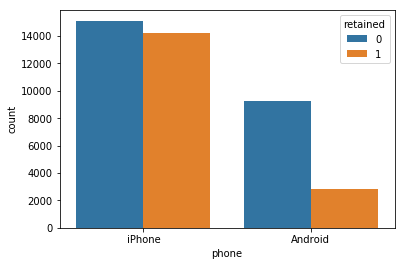

In [74]:
sns.countplot(x='phone', data=ulti_data_nona, hue='retained')

We can see that there are more active users use iphone than Android cell phones. And there are far more users that use iphone instead of Android cell phones.  

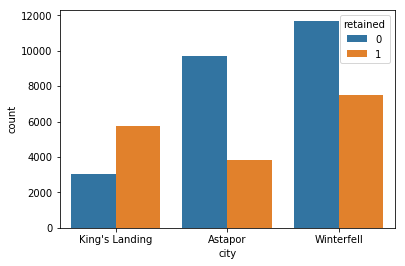

In [75]:
sns.countplot(x = 'city', data = ulti_data_nona, hue = 'retained')

It seems that users in City King's Landing are tend to take trips more compared to other two cities. 

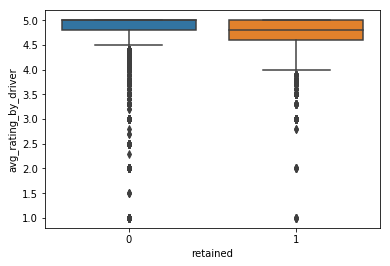

In [77]:
sns.boxplot(x = 'retained', y = 'avg_rating_by_driver', data = ulti_data_nona)

Based on the boxplot, riders tend to rate their trip higher if they are does not take trip by Ultimate's system.  

In [95]:
# check balance of labels 
ulti_data_nona['retained'].value_counts()

0    24410
1    17035
Name: retained, dtype: int64

Since the labels are inbalanced, precision and recall are used to evaluate the model. 

In [72]:
# create dummy
ulti_dummy = pd.get_dummies(ulti_data_nona)

In [73]:
ulti_dummy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,0,1,1,0


In [79]:
X = ulti_dummy.drop(['retained'], axis = 1)
y = ulti_dummy['retained']

### Model Training : Random Forest

In [85]:
# Import the necessary modules
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create the classifier: logreg
clf = RandomForestClassifier(n_estimators = 200)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(x_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3836  987]
 [1087 2379]]
             precision    recall  f1-score   support

          0       0.78      0.80      0.79      4823
          1       0.71      0.69      0.70      3466

avg / total       0.75      0.75      0.75      8289



#### ROC CURVE

In [87]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score


# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(x_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 10-fold cross-validation: {}".format(cv_auc))



AUC: 0.8218900012550462
AUC scores computed using 5-fold cross-validation: [0.82013572 0.81952951 0.82495401 0.81976945 0.82302696 0.8178752
 0.82190007 0.82787875 0.82436145 0.81923182]


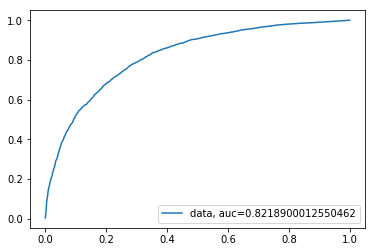

In [97]:
# plot auc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

based on the result of ROCX curve, the AUC is 0.82, meaning the model is a good fit to the data.

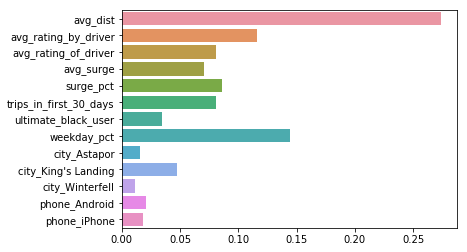

In [98]:
sns.barplot(y=X.columns, x=clf.feature_importances_)

The feature importance showed that the average distance in miles per trip taken in the first 30 days after signup is the most influential to whether the user will be retained or not. It acocunts for more than 25% of importance compared to other feautres. 